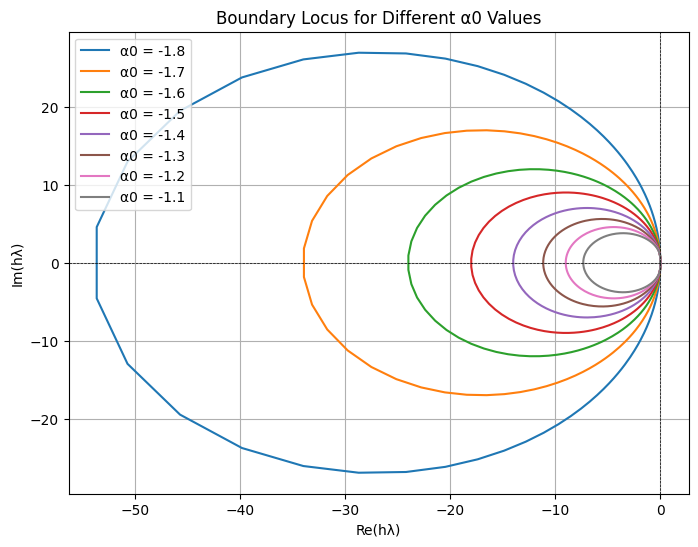

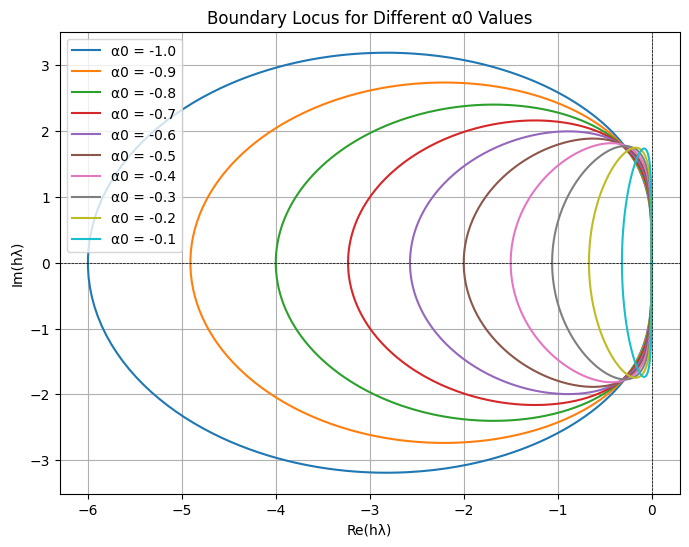

α0 = -1.8 → RAS is Inside
α0 = -1.7 → RAS is Inside
α0 = -1.6 → RAS is Inside
α0 = -1.5 → RAS is Inside
α0 = -1.4 → RAS is Inside
α0 = -1.3 → RAS is Inside
α0 = -1.2 → RAS is Inside
α0 = -1.1 → RAS is Inside
α0 = -1.0 → RAS is Inside
α0 = -0.9 → RAS is Inside
α0 = -0.8 → RAS is Inside
α0 = -0.7 → RAS is Inside
α0 = -0.6 → RAS is Inside
α0 = -0.5 → RAS is Inside
α0 = -0.4 → RAS is Inside
α0 = -0.3 → RAS is Inside
α0 = -0.2 → RAS is Inside
α0 = -0.1 → RAS is Inside


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, exp, I

#Part d
alpha0, alpha1, beta_m1, beta0, beta1 = symbols('alpha0 alpha1 beta_m1 beta0 beta1')

eq1 = Eq(1 + alpha0 + alpha1, 0)
eq2 = Eq(2 + alpha0, beta_m1 + beta0 + beta1)
eq3 = Eq(2*beta_m1 + beta0, 2 + alpha0/2)
eq4 = Eq(2*beta_m1 + beta0/2, 4/3 + alpha0/6)

solutions = solve((eq1, eq2, eq3, eq4), (alpha1, beta_m1, beta0, beta1))

def plot_boundary_locus(alpha0_values, num_points=500):
    theta = np.linspace(0, 2 * np.pi, num_points)
    z_vals = np.exp(1j * theta)

    fig, ax = plt.subplots(figsize=(8, 6))

    for alpha0_val in alpha0_values:
        alpha1_val = float(solutions[alpha1].subs(alpha0, alpha0_val).evalf())
        beta_m1_val = float(solutions[beta_m1].subs(alpha0, alpha0_val).evalf())
        beta0_val = float(solutions[beta0].subs(alpha0, alpha0_val).evalf())
        beta1_val = float(solutions[beta1].subs(alpha0, alpha0_val).evalf())

        rho_vals = z_vals**2 + alpha0_val * z_vals + alpha1_val
        sigma_vals = beta_m1_val * z_vals**2 + beta0_val * z_vals + beta1_val

        h_lambda_vals = rho_vals / sigma_vals

        ax.plot(h_lambda_vals.real, h_lambda_vals.imag, label=f'α0 = {alpha0_val:.1f}')

    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.set_xlabel("Re(hλ)")
    ax.set_ylabel("Im(hλ)")
    ax.set_title("Boundary Locus for Different α0 Values")
    ax.legend()
    ax.grid()

    plt.show()

alpha0_set1 = np.arange(-1.8, -1.0, 0.1)
alpha0_set2 = np.arange(-1.0, 0.0, 0.1)

plot_boundary_locus(alpha0_set1)
plot_boundary_locus(alpha0_set2)

# Part e
def check_root_condition(alpha0_val):

    alpha1_val = float(solutions[alpha1].subs(alpha0, alpha0_val).evalf())

    coeffs = [1, alpha0_val, alpha1_val]

    roots = np.roots(coeffs)

    stable = all(np.abs(roots) <= 1)

    return stable, roots

def check_ras_inside(alpha0_values):

    results = {}

    for alpha0_val in alpha0_values:
        stable, roots = check_root_condition(alpha0_val)
        results[alpha0_val] = "Inside" if stable else "Outside"

    return results

alpha0_test_values = np.arange(-1.8, 0.0, 0.1)

ras_results = check_ras_inside(alpha0_test_values)

for alpha0_val, status in ras_results.items():
    print(f"α0 = {alpha0_val:.1f} → RAS is {status}")
